# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [251]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [252]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [253]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [254]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [256]:
# Checking for missing values in the data
# function to print the sum of null values for each column
df.isnull().sum()  

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [257]:
# Get the summary statistics of the numerical data
# function to print the statitical summary of the data 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Minimum time to prepare food: 20 mins
#### maximum time to prepare food: 35 mins
#### Average time to prepare food: 27.37 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [258]:
df['rating'].value_counts() ## Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Orders not rated: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [259]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [260]:
# check unique customer ID
df['customer_id'].nunique()  


1200

#### Restaurant name

In [261]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  


178

#### Cuisine type

In [262]:
# Check unique cuisine type
df['cuisine_type'].nunique() 


14

<Axes: xlabel='cuisine_type', ylabel='count'>

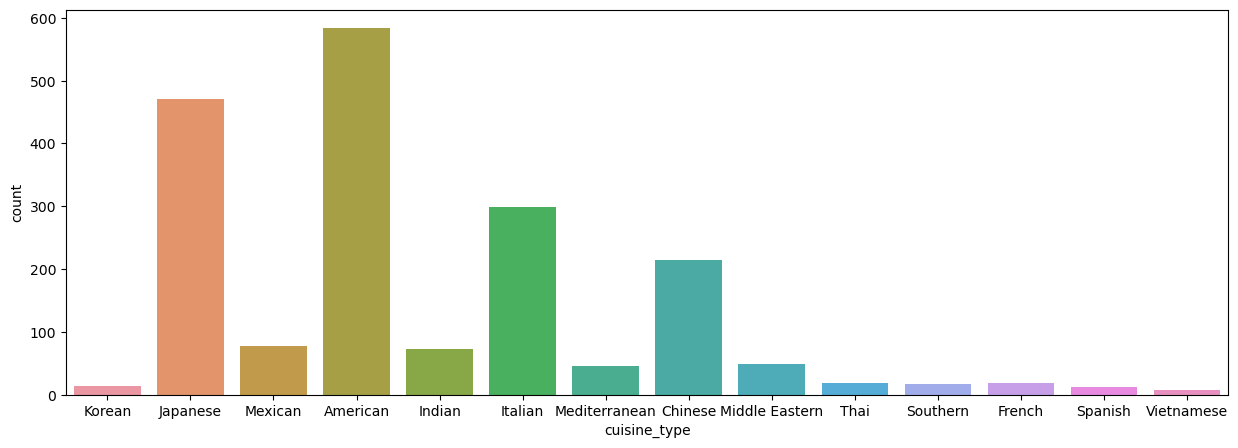

In [263]:
plt.figure(figsize = (15,5))
## countplot for cuisine type.
sns.countplot(data = df, x = 'cuisine_type') 


#### Cost of the order

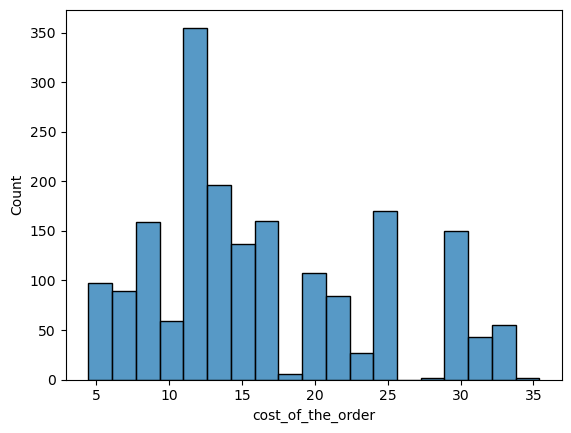

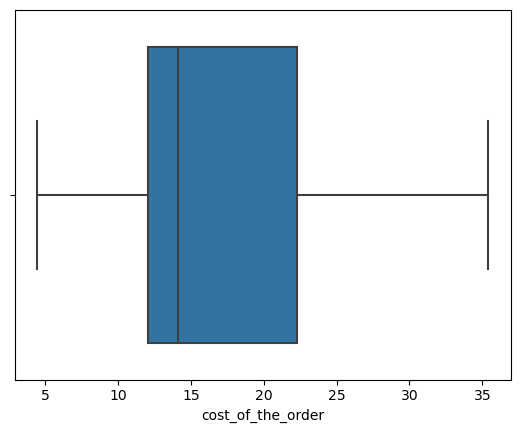

In [264]:
sns.histplot(data=df,x='cost_of_the_order') 
## Histogram for the cost of order
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show() 

#### Day of the week

In [265]:
# # Check the unique values for the 'day_of_the_week' column
df['day_of_the_week'].nunique() 


2

<Axes: xlabel='day_of_the_week', ylabel='count'>

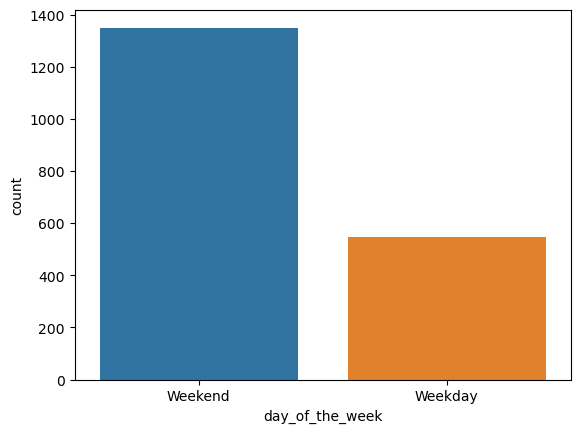

In [266]:
## plot a bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week') 


#### Rating

In [267]:
# Check the unique values for the 'rating' column
df['rating'].nunique() 

4

<Axes: xlabel='rating', ylabel='count'>

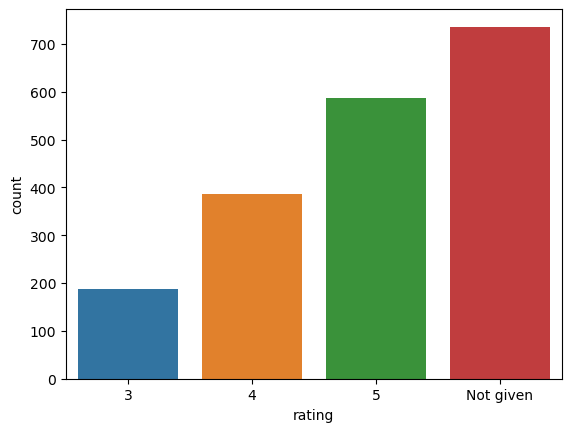

In [268]:
## plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating', order=['3','4','5','Not given']) 

#### Food Preparation time

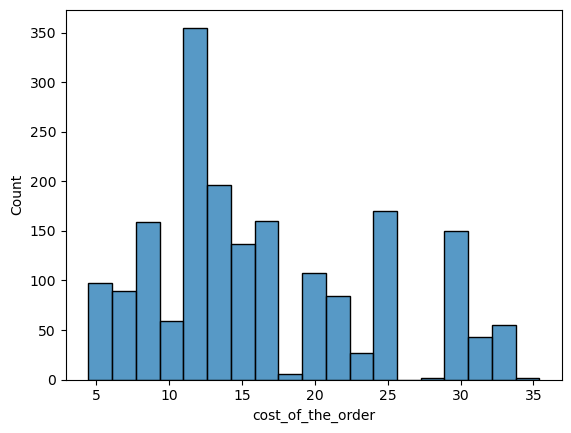

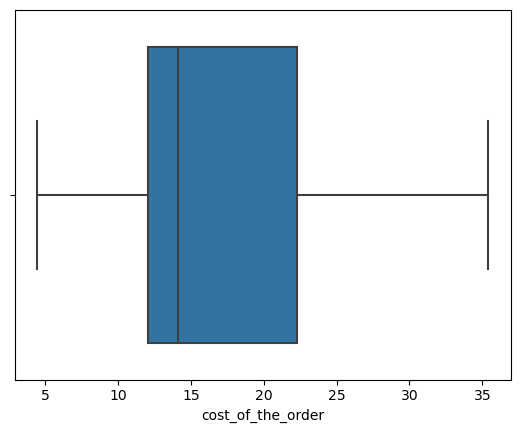

In [269]:
sns.histplot(data=df,x='cost_of_the_order') 
## plot the histogram for the cost of order
plt.show()
## plot the boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()

#### Delivery time

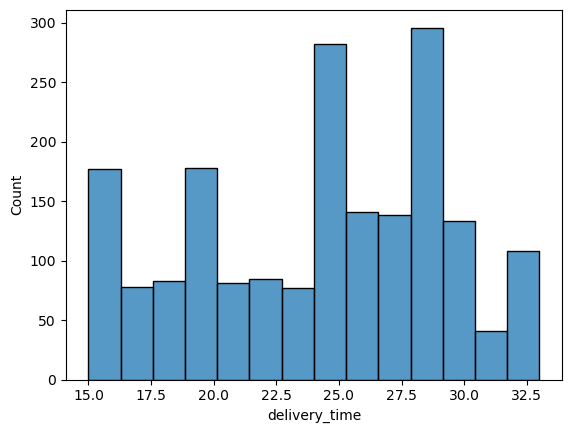

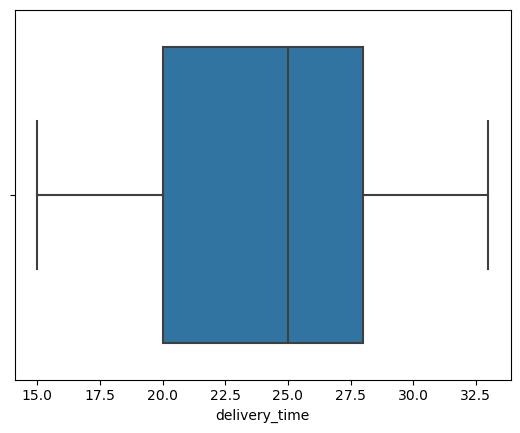

In [270]:
## plot the histogram for the delivery time
sns.histplot(data=df,x='delivery_time') 
plt.show()
## plot the boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time') 
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [271]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [272]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
## check unique values for the cuisine type on weekend
df_weekend['cuisine_type'].value_counts()


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### The most popular cuisine on the weekend is American

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [273]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [274]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [275]:
# Get the counts of  each customer_id to get the top 3 most 
## frequent customers
df['customer_id'].value_counts().head(3)


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

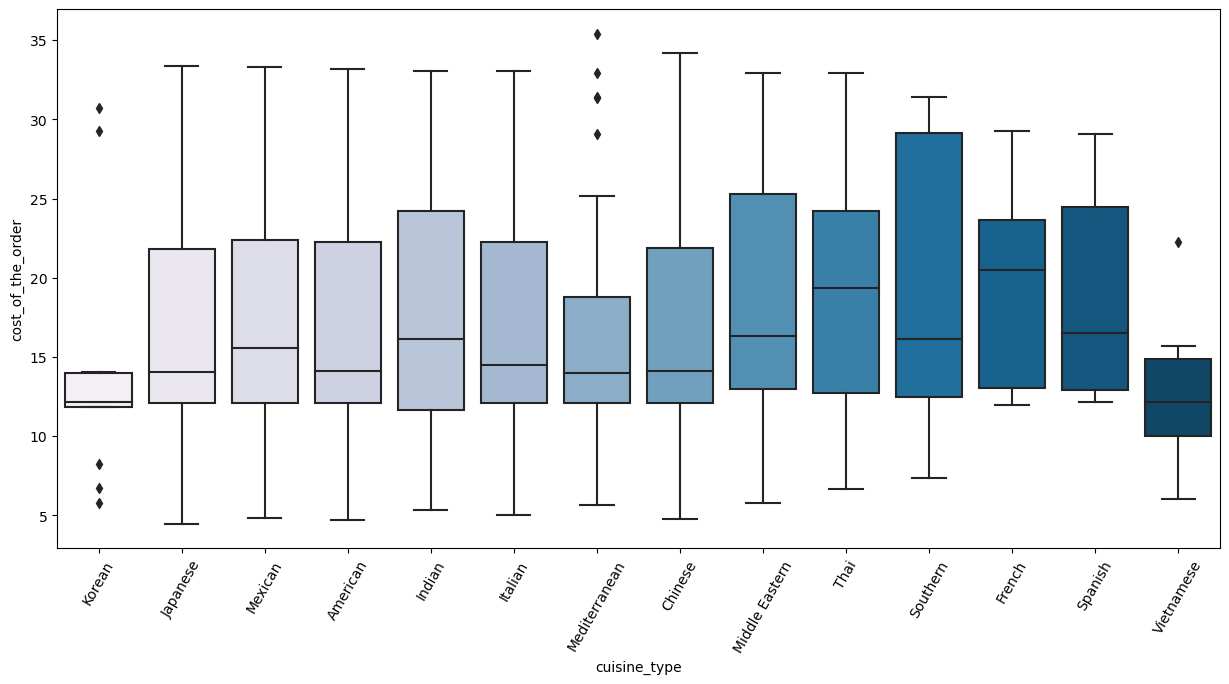

In [276]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

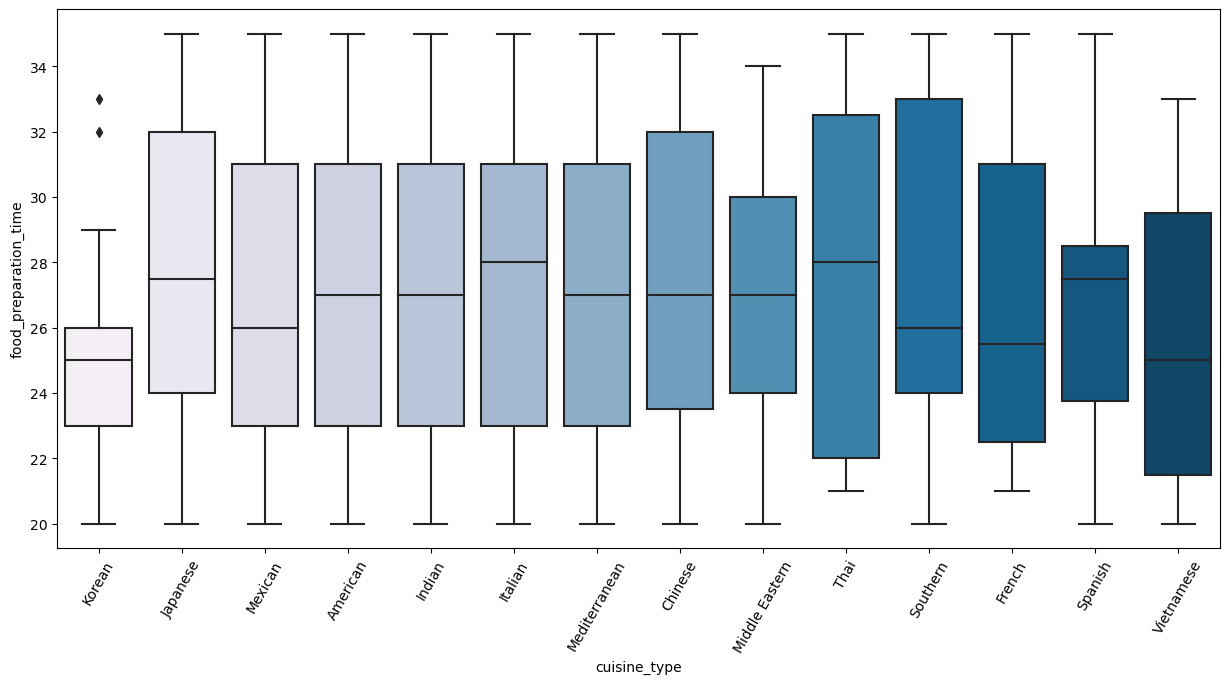

In [277]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

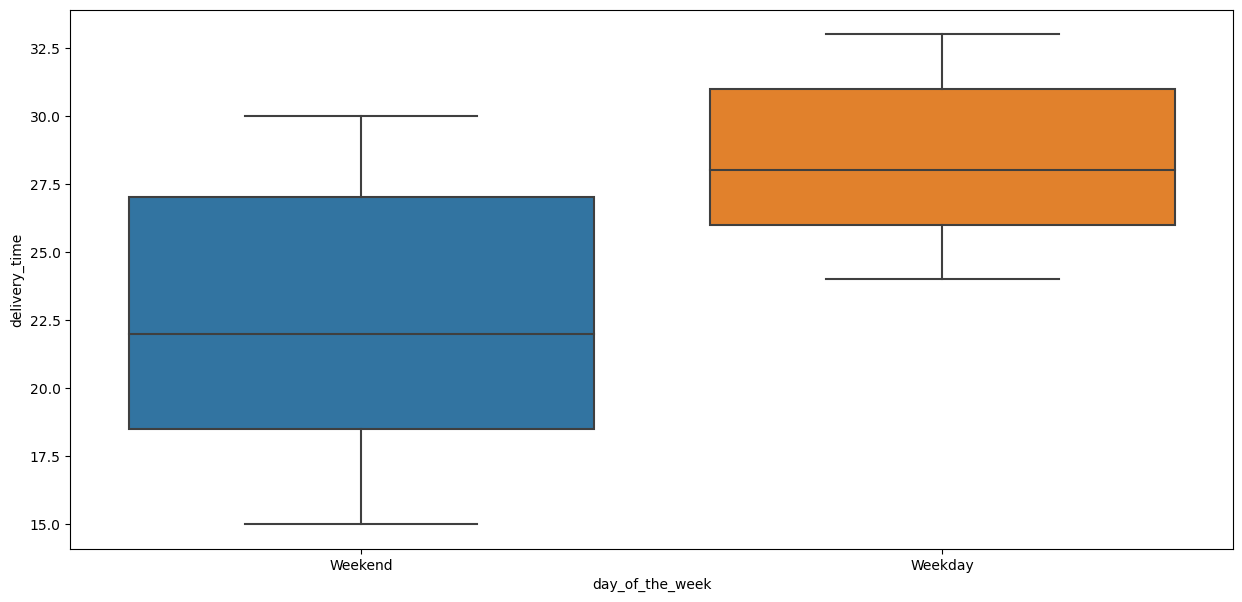

In [278]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week", y="delivery_time", data = df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [279]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Rubirosa                         660.45
Sushi of Gari 46                 640.87
Nobu Next Door                   623.67
Five Guys Burgers and Fries      506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

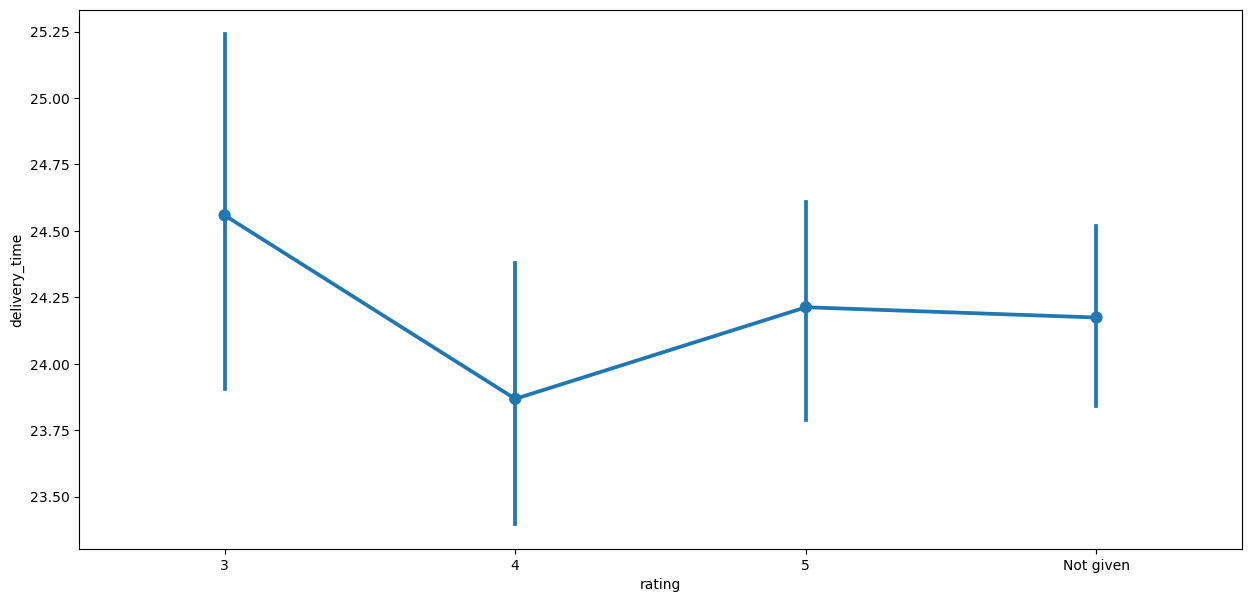

In [280]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order=['3','4', '5', 'Not given'])
plt.show()

#### Rating vs Food preparation time

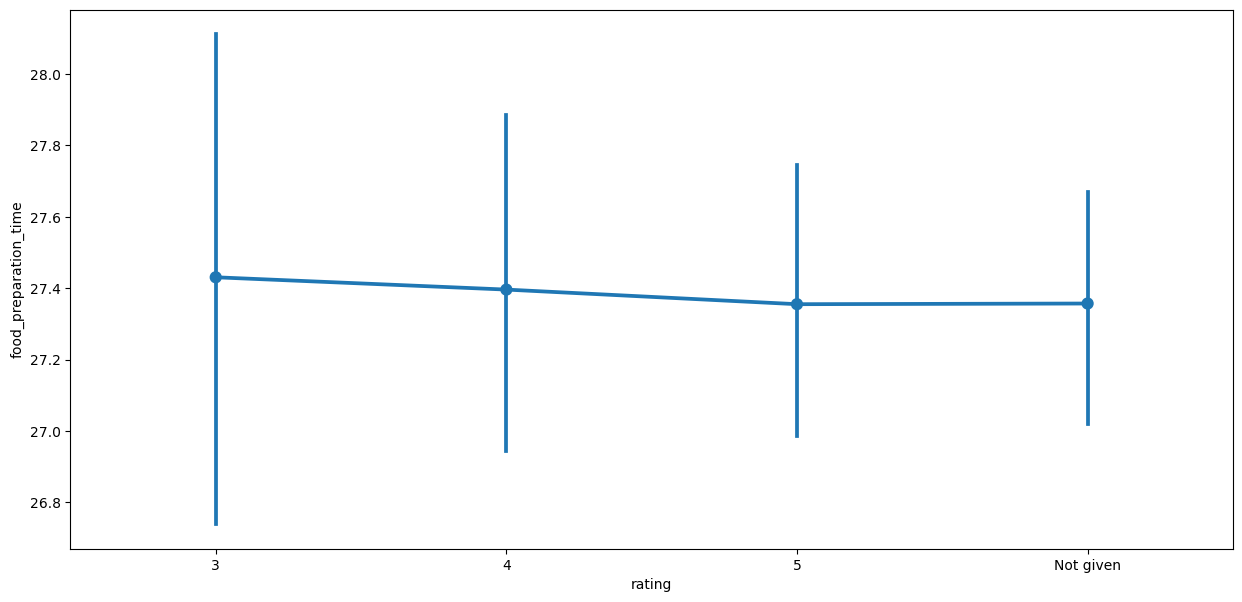

In [281]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating", y = "food_preparation_time", data =df, order=['3','4', '5', 'Not given'])  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

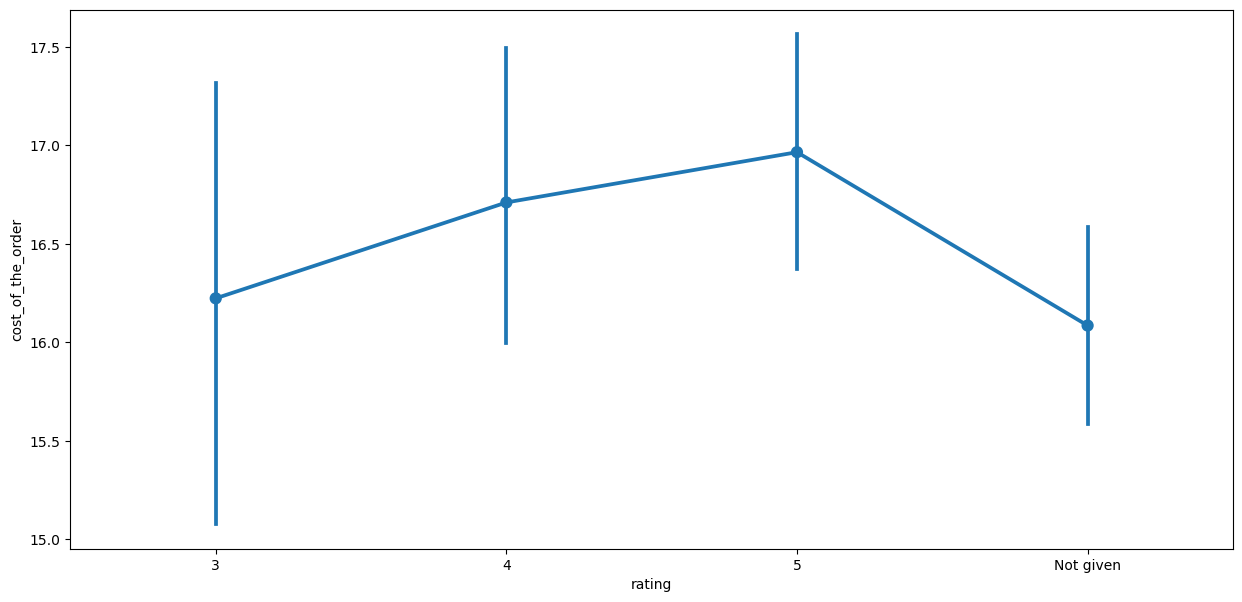

In [282]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating", y="cost_of_the_order", data = df, order=['3','4', '5', 'Not given'])   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

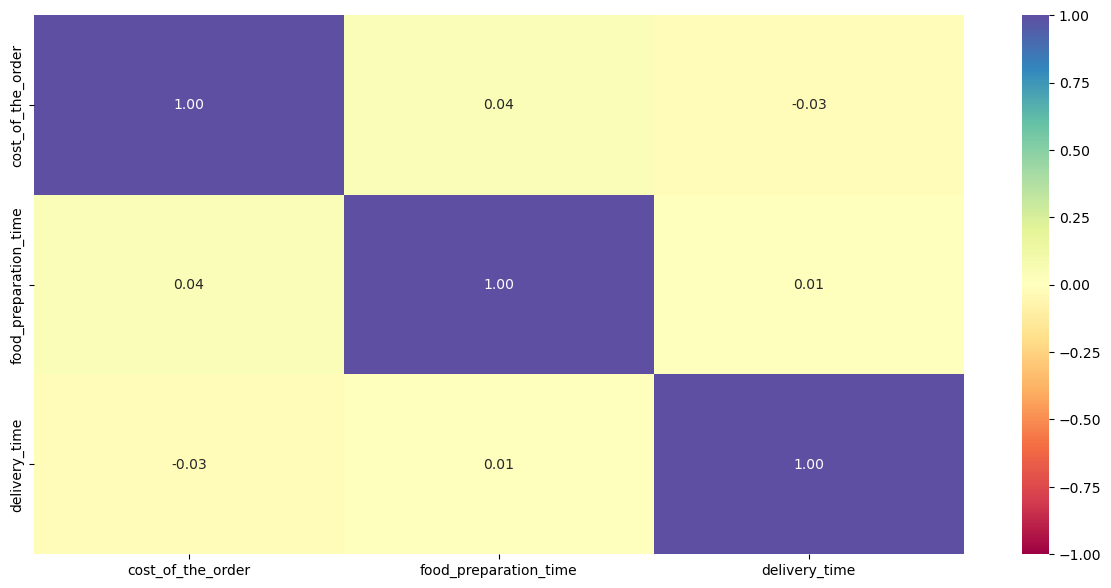

In [283]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [284]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int') 
# filter restaurants with ratings greater than 4 only
df_rated = df_rated[df_rated['rating']>4]

df_rated.shape

(588, 9)

In [285]:
# Create a dataframe that contains the restaurant names 
# with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count


,restaurant_name,rating
0,Shake Shack,60
1,The Meatball Shop,53
2,Blue Ribbon Sushi,32
3,Blue Ribbon Fried Chicken,32
4,RedFarm Broadway,18
...,...,...
116,Haru Gramercy Park,1
117,Galli Restaurant,1
118,Five Leaves,1
119,El Parador Cafe,1


In [286]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]
rest_names.head()


,restaurant_name,rating
0,Shake Shack,60
1,The Meatball Shop,53


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [287]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

## compute the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
# get the total revenue and print it
total_rev = df['Revenue'].sum() 
## get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


### Method 1

In [288]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## percentage of orders that have 
## more than 60 minutes of total delivery time 

def compute_total_delivery_time(x):
    if(x>60):
        return 1
    else:
        return 0
    
df['late_deliveries'] = df['total_time'].apply(compute_total_delivery_time)
df.head()

print("Number of orders late by 60 mins: ", df['late_deliveries'].sum())
percentage = df['late_deliveries'].sum() / len(df)
print("Percentage of orders late by 60 mins: ", round(percentage*100,2), "%")


Number of orders late by 60 mins:  200
Percentage of orders late by 60 mins:  10.54 %


### Method 2

In [289]:
## get the orders having delay>60
df_greater_than_60 = df[df['total_time']>60] 

# Calculate the number of orders where the delay>60mins
print('The number of total orders that are delivered later than 60 mins:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders late by 60 mins:", round(percentage, 2), '%')

The number of total orders that are delivered later than 60 mins: 200
Percentage of orders late by 60 mins: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [290]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

## get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] != 'Weekday']['delivery_time'].mean()),
     'minutes')



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Data contains ~1900 records with 1200 customers, 178 restaurants, 14 cuisines and there exist no missing values
*  Average food preparation time is around 14.5 mins, with maximum variability in Thai cuisine between 22-32 mins.
*  About 39% of the orders are not rated that impact marketing plans
*  Major cuisines ordered are American, Japanese, Italian and Chinese
*  Average cost of the order is 14.5 dollars, with 30% of orders over 20 dollars, and majority within the range of 5 dollars to 33 dollars. 
*  Average delivery time is around 24 mins, with high order count on weekends and high variability (18 - 27 mins) on weekends as well. About 10 % of the orders are late by more than 60 mins. Mean delivery time on weekdays is 22 mins and on weekends is 28 mins.  
*  Orders are doubled on weekends
*  There are 3 most frequent customers with at least 9 orders
*  There are 3 restaurants with over 100 orders and 1 restaurant with over 200 orders
*  The top 5 restaurants generate at least 1100 dollars revenue for themselves. The next 9 restaurants generate at least 500 dollars in revenue.
*  Ratings are higher if the preparation time is lower. Counter intuitively, ratings are higher with higher costs. Delivery times, though expected to have some relationship with ratings, is not impacting ratings with current values
*  Net revenue with 178 restaurants for the Company is over 6000 dollars



### Recommendations:

*  Incentivize customers to provide ratings
*  Incentivize restaurants with highest ratings to lower their preparation time on the weekends.
*  Provide discounts on American, Japanese, Italian and Chinese cuisines
*  Provide referral discounts to the most frequent customers
*  Gather more data to resolve high delivery times for 10% of the orders, and understanding the impact of delivery times on the ratings. Intuitively, a lower delivery time should result in a higher rating. 


---